# Response time and equilibrium states of glaciers with different bed types

In [305]:
# The commands below are just importing the necessary modules and functions
# Plot defaults
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams['figure.figsize'] = (9, 6)  # Default plot size
# Scientific packages
import numpy as np
# Constants
from oggm.cfg import SEC_IN_YEAR
# OGGM models
from oggm.core.models.massbalance import ConstantBalanceModel
from oggm.core.models.flowline import FluxBasedModel
from oggm.core.models.flowline import VerticalWallFlowline, TrapezoidalFlowline, ParabolicFlowline
# This is to set a default parameter to a function. Just ignore it for now
from functools import partial
FlowlineModel = partial(FluxBasedModel, inplace=False)

In [2]:
import matplotlib as mpl
# modify plot properties
mpl.rc('lines', linewidth=1.5)

mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=15)

mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

mpl.rc('legend', fontsize=15)
mpl.rc('legend', frameon=True)

In [3]:
import my_colors as mc
vert_fl_col = [mc.vert_fl_1, mc.vert_fl_2, mc.vert_fl_3]
trap_fl_col = [mc.trap_fl_1, mc.trap_fl_2, mc.trap_fl_3]
para_fl_col = [mc.para_fl_1, mc.para_fl_2, mc.para_fl_3]

(-1, 9)

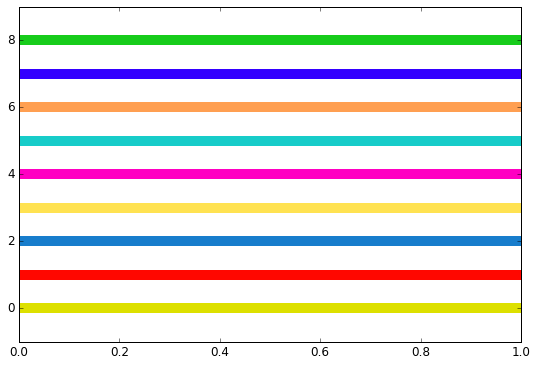

In [4]:
for i in range(0,3):
    color_list = [vert_fl_col[i], trap_fl_col[i], para_fl_col[i]]
    for k in range(0,3):
        plt.axhline(i+k+i*2, lw=10, color=color_list[k])
        
plt.ylim([-1,9])

## Glacier bed

In [351]:
# This is the bed rock
# linearily decreasing from altitude z1 to z2, in nx steps
nx = 800
z1 = 3500
z2 = 0
z_ref = ela = 3000
factor_1 = 1.5
factor_2 = 0.5

bed_h_0 = np.linspace(z1, z2, nx)
bed_h_1 = bed_h_0 * factor_1 + (z_ref*(1-factor_1))
bed_h_2 = bed_h_0 * factor_2 + (z_ref*(1-factor_2))

# Let's set the model grid spacing to 100m (needed later)
map_dx = 1e4/nx

In [352]:
bed_h_0.size

800

In [353]:
bed_h_col = ['#6C7A89','#ABB7B7', 'k']

nx = end_bed_h = 4000/map_dx

bed_h_list = list()
bed_h_list.append(bed_h_0[:end_bed_h])
bed_h_list.append(bed_h_1[:end_bed_h])
bed_h_list.append(bed_h_2[:end_bed_h])

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [354]:
# calc slope
deg = np.zeros(3)
#x = np.linspace(0, (nx-1)*map_dx, nx)
x = np.linspace(0, (end_bed_h-1)*map_dx, end_bed_h)
for i,b in enumerate(bed_h_list):
    dy = b[0] - b[-1]
    dx = x[-1] - x[0]
    a = np.arctan(dy/dx)
    deg[i] = np.rad2deg(a)

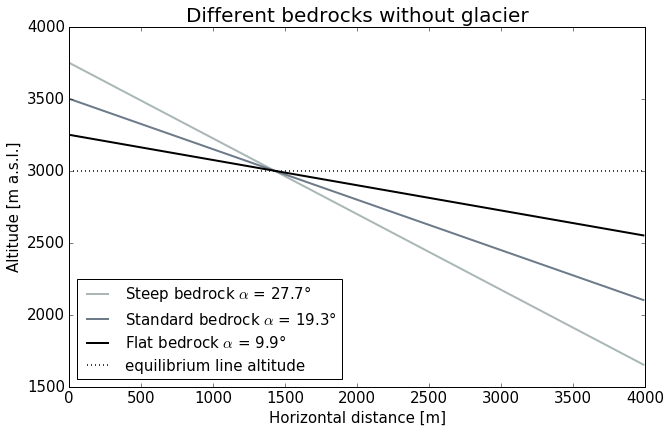

In [355]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 0.625])

plt.plot(x, bed_h_list[1], color=bed_h_col[1], label=r'Steep bedrock $\alpha$ = {}°'.format(round(deg[1],1)), lw=2)
plt.plot(x, bed_h_list[0], color=bed_h_col[0], label=r'Standard bedrock $\alpha$ = {}°'.format(round(deg[0],1)), lw=2)
plt.plot(x, bed_h_list[2], color=bed_h_col[2], label=r'Flat bedrock $\alpha$ = {}°'.format(round(deg[2],1)), lw=2)

plt.axhline(z_ref, color='k', label='equilibrium line altitude', linestyle=':')

plt.title('Different bedrocks without glacier');
plt.xlabel('Horizontal distance [m]');
plt.ylabel('Altitude [m a.s.l.]');

plt.legend(loc=3);

plt.gca().set_aspect('equal', adjustable='box')
plt.axis([0,4e3, 1.5e3,4e3]);

## Mass balance

Defining the mass balance model with an equilibrium-line altitude mb_ela im m and an altitude gradient mb_grad in mm m$^{-1}$

In [356]:
mb_ela = 3000
mb_grad = 5
mb_model = ConstantBalanceModel(mb_ela, grad=mb_grad)

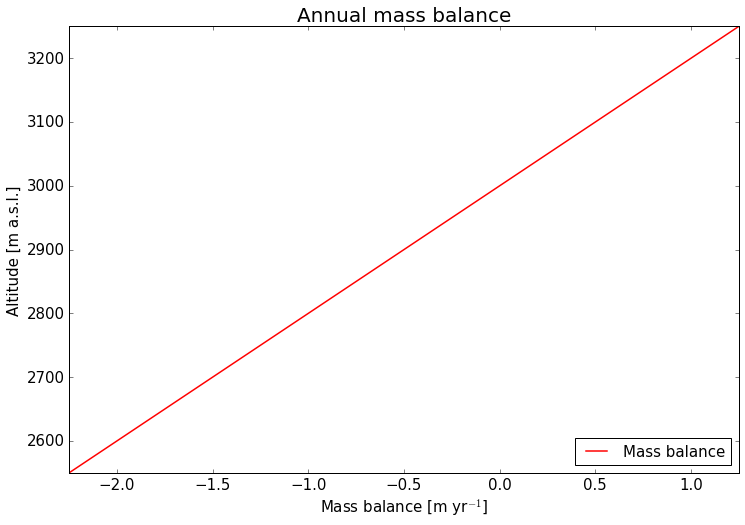

In [357]:
plt.plot(mb_model.get_mb(surface_h)*SEC_IN_YEAR,
         bed_h, color='r', label='Mass balance')
plt.xlabel('Mass balance [m yr$^{-1}$]')
plt.ylabel('Altitude [m a.s.l.]')
plt.title('Annual mass balance')
plt.axis('tight')
plt.legend(loc=4)

## Flowlines

In [358]:
ind_bed_h = 2
bed_h = bed_h_list[ind_bed_h].copy()
# At the begining, there is no glacier so our glacier surface is at the bed altitude
surface_h = bed_h

Define widths and the three different flowline types as a list.

In [359]:
flowline_name = ['Vertical Wall Flowline', 
                 'Trapezoidal Flowline', 
                 'Parabolic Flowline']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

### Vertical Wall Flowline

In [360]:
# The units of widths is in "grid points"
w = np.zeros(nx) + 2.8
# Define our U-shaped bed 
init_flowline[0] = VerticalWallFlowline(surface_h=surface_h, bed_h=bed_h,
                            widths=w, map_dx=map_dx)

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


### Trapezoidal Flowline

In [361]:
# The units of widths is in "grid points"
widths = np.zeros(nx) + 2.
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

# Define our bed
init_flowline[1] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                    widths=widths, map_dx=map_dx,
                                    lambdas=lambdas)

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Parabolic Flowline

In [362]:
# Define the bed shape
bed_shape = np.zeros(nx) + 0.004

# Define our bed
init_flowline[2] = ParabolicFlowline(surface_h=surface_h, bed_h=bed_h,
                                    bed_shape=bed_shape, map_dx=map_dx)

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


## Model run

#### for n years

In [349]:
year = 100
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
years_cont = np.zeros(n_flowline)

widths_cont = list()
sec_cont = list()
index_terminus = np.zeros(n_flowline)

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for '.format(i+1) + flowline_name[i] + '...')
    
    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until(year)
    
    fls = model.fls[-1]
    
    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    years_cont[i] = model.yr
    
    widths_cont.append(fls.widths_m)
    sec_cont.append(fls.section)
    
    bed_h_cont[i] = fls.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = fls.surface_h
    
    index_terminus[i] = np.where(surface_h_cont[i] == bed_h)[0][0] + 1

1: Running model for Vertical Wall Flowline...
    ... and storing output.
2: Running model for Trapezoidal Flowline...
    ... and storing output.
3: Running model for Parabolic Flowline...
    ... and storing output.


#### till equilibrium

In [342]:
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
years_cont = np.zeros(n_flowline)

widths_cont = list()
sec_cont = list()
index_terminus = np.zeros(n_flowline)

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for '.format(i+1) + flowline_name[i] + '...')
    
    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()
    print(model.yr)
    
    fls = model.fls[-1]
    
    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    years_cont[i] = model.yr
    
    widths_cont.append(fls.widths_m)
    sec_cont.append(fls.section)
    
    bed_h_cont[i] = fls.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = fls.surface_h
    
    index_terminus[i] = np.where(surface_h_cont[i] == bed_h)[0][0] + 1

1: Running model for Vertical Wall Flowline...
35.0
    ... and storing output.
2: Running model for Trapezoidal Flowline...
45.0
    ... and storing output.
3: Running model for Parabolic Flowline...
40.0
    ... and storing output.


#### Plot glacier outlines

3944.0


/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


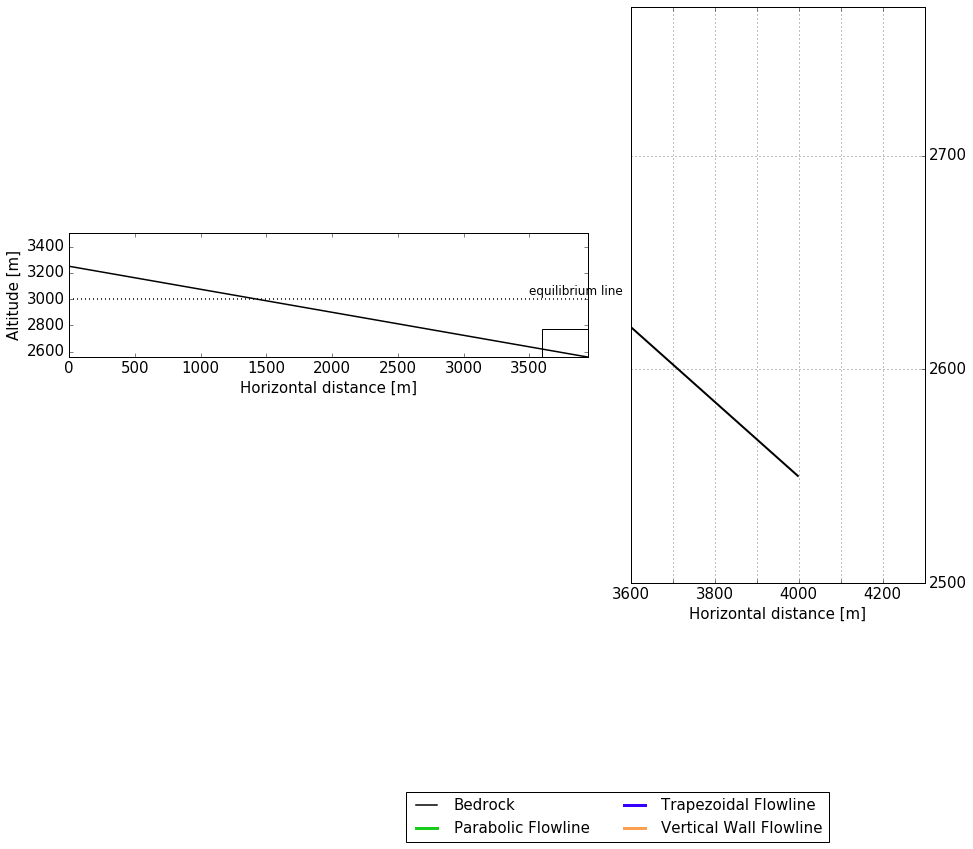

In [350]:
mpl.rc('figure', figsize = (12, 8))

# flat bed

eq = 0

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 2560
y1 = 3500

# limits of zoomed panel
dx_ = 700
x0_ = 3600
x1_ = x0_ + dx_

dy_ = dx_*0.385
y0_ = 2500
y1_ = y0_ + dy_


x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)


fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))

ax1.axhline(ela, color='k', linestyle=':')
x_t = 3500
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
#ax1.set_xticklabels(['','1000','2000','3000','4000','5000',''])

ax1.set_ylim([y0,y1])
#ax1.set_yticks(np.arange(2200, 3401, 400))

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)
lw=4

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=lw)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');

ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])

ax2.set_xticks(np.arange(3600, 4301, 100))
ax2.set_xticklabels(['3600', '', '3800', '', '4000', '', '4200'])
ax2.set_yticks(np.arange(2500, 2701, 100))
ax2.yaxis.tick_right()



ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.35), ncol=2)

In [338]:
np.where(bed_h < 2560)[0][0]

1972

3425.0


/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


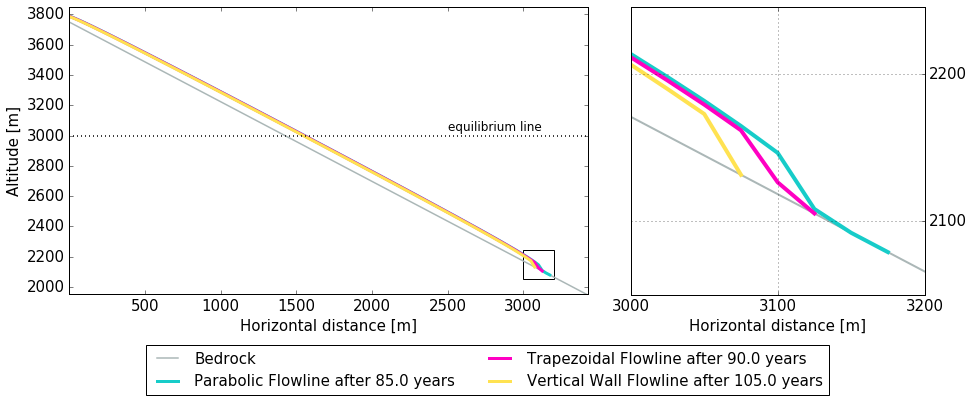

In [185]:
mpl.rc('figure', figsize = (12, 8))
# steep bed
eq = 1

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 1950
y1 = 3850

x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)

# limits of zoomed panel
dx_ = 200
x0_ = 3000
x1_ = x0_ + dx_

dy_ = dx_*0.98
y0_ = 2050
y1_ = y0_ + dy_

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))

ax1.axhline(ela, color='k', linestyle=':')
x_t = 2500
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
ax1.set_xticklabels(['','500','1000','1500','2000','2500','3000'])

ax1.set_ylim([y0,y1])
ax1.set_yticks(np.arange(2000, 3801, 200))

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=4)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');

ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])
ax2.set_xticks(np.arange(3000, 3201, 100))
ax2.set_yticks(np.arange(2100, 2201, 100))
ax2.yaxis.tick_right()


ax2.set_aspect('equal', adjustable='box')

ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.15), ncol=2)

3425.0


/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


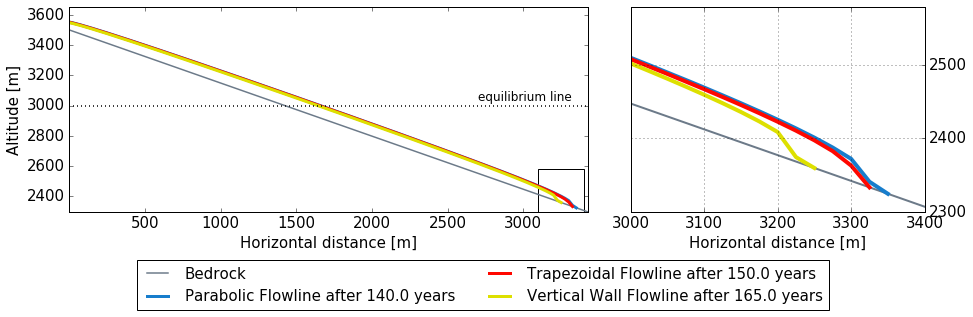

In [216]:
mpl.rc('figure', figsize = (12, 8))
# std glacier
eq = 1

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 2300
y1 = 3650

x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1.5])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))
ax1.axhline(ela, color='k', linestyle=':')
x_t = 2700
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

year = 0
title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
ax1.set_xticklabels(['','500','1000','1500','2000','2500','3000' ])

ax1.set_ylim([y0,y1])
ax1.set_yticks(np.arange(2400, 3601, 200))

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1.5])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=4)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');

# limits of zoomed panel
dx_ = 300
x0_ = 3100
x1_ = x0_ + dx_

dy_ = dx_*0.93
y0_ = 2300
y1_ = y0_ + dy_



ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])

ax2.set_xticks(np.arange(3000, 3401, 100))
ax2.set_yticks(np.arange(2300, 2501, 100))
ax2.yaxis.tick_right()

ax2.set_aspect('equal', adjustable='box')

ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.2), ncol=2)

In [213]:
dx

9975.0

In [42]:
dx*0.6/(y1-y0)

4.615384615384615

In [137]:
model.fls[-1].length_m

3150.0

In [153]:
model.fls[-1].length_m

3375.0

In [ ]:
k = 1
for i in range(0,3)[::-1]:
    ind_term = np.where(surface_h_cont[i] == bed_h)[0][0]
    print(surface_h_cont[i][ind_term-k]-bed_h[ind_term-k])

In [ ]:
np.rad2deg(np.arctan(5.8/17))

In [ ]:
for l in lenght_cont:
    print(l)

In [ ]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    thick.append(thick_)
    thickness[i] = thick_[:72].mean()
    plt.plot(thick_/thick_.max())
    
thickness

In [ ]:
for i, sec_ in enumerate(sec_cont):
    mean = sec_[:72].mean()
    plt.plot(sec_/sec_.max(), label='{}:{} k'.format(flowline_name[i], round(mean/1e3)))
    
plt.legend()

In [ ]:
for i, wi_ in enumerate(widths_cont):
    mean = wi_[:72].mean()
    plt.plot(wi_, label='{}: {}'.format(flowline_name[i], round(mean)))
    
plt.legend()

### Model run till equilibrium

In [ ]:
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))
    
    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()
    
    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h

### Plot glacier outlines

In [ ]:
color_list = ['r', 'b', 'g']
plt.plot(bed_h_cont[0], color='k', label='Bedrock')

for i in range(0, n_flowline):
    plt.plot(surface_h_cont[i], color=color_list[i],
             label=flowline_name[i]+' after {} years'.format(year_cont[i]))
    
plt.title('Glacier outline in equilibrium state')
plt.xlabel('Grid points')
plt.ylabel('Altitude [m]')
plt.legend(loc='best')

### Loop model run

Run the model in a loop to get more information about the evolution of the glacier and to store some intermediate steps from year0 to year1 in year_step steps.

In [ ]:
# Define an array for all years of interest
year0 = 0
year1 = 250
year_step = 1
years = np.arange(year0, year1+1, year_step)
n_exp = years.size

In [ ]:
# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))
weights_cont_ = list()
sec_cont_ = list()

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    weight_cont__ = list()
    sec_cont__ = list()
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        if(np.mod(year_, 50) == 0):
            print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3
        weight_cont__.append( model.fls[-1].widths_m)
        sec_cont__.append( model.fls[-1].section)
    
    weights_cont_.append(weight_cont__)
    sec_cont_.append(sec_cont__)

### Plot different glacier priorities over the time

In [ ]:
for i in range(0, n_flowline):
    len_max = lenght_cont_[i][lenght_cont_[i].argmax()]
    plt.plot(years, lenght_cont_[i]/len_max, label=flowline_name[i])

plt.title('Glacier lenght development over time')
plt.xlabel('Years')
plt.ylabel('relative lenght')
plt.legend(loc='best')

In [ ]:
for i in range(0, n_flowline):
    vol_max = volume_cont_[i][-1]
    plt.plot(years, volume_cont_[i]/vol_max, label=flowline_name[i])

plt.title('Glacier volume development over time')
plt.xlabel('Years')
plt.ylabel('Volume [m$^3$]')
plt.legend(loc='best')

##### Loop model: focus on interesting parts

In [ ]:
# Define an array for all years of interest
year0 = 0
year1 = 100
year_step = 1
years = np.arange(year0, year1+1, year_step)
n_exp = years.size
print(years)

In [ ]:
# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))

print(type(lenght_cont_))

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3

In [ ]:
for i in range(0, n_flowline):
    plt.plot(years, volume_cont_[i], label=flowline_name[i])

plt.title('Glacier volume development over time')
plt.xlabel('Years')
plt.ylabel('Volume [m$^3$]')
plt.legend(loc='best')

## How does width affect length and volume change?!

In [107]:
section = list()

#### Trapezoidal bed

In [108]:
flowline_name = ['Width: 100m', 
                 'Width: 200m', 
                 'Width: 300m', 
                 'Width: 400m',
                 'Width: 500m', 
                 'Width: 600m', 
                 'Width: 700m', 
                 'Width: 800m', 
                 'Width: 900m', 
                 'Width: 1000m']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [124]:
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

for i, w in enumerate(np.arange(1, 10+1, 1)):
    widths = np.zeros(nx) + w
    # Define our bed
    init_flowline[i] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=widths, map_dx=map_dx,
                                           lambdas=lambdas)
    
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h
    width_cont.append(model.fls[-1].widths_m)
    sec_cont.append(model.fls[-1].section)

1: Running model for Width: 100m ...
    ... and storing output.
2: Running model for Width: 200m ...
    ... and storing output.
3: Running model for Width: 280m ...
    ... and storing output.
4: Running model for Width: 400m ...
    ... and storing output.
5: Running model for Width: 500m ...
    ... and storing output.
6: Running model for Width: 600m ...
    ... and storing output.
7: Running model for Width: 700m ...
    ... and storing output.
8: Running model for Width: 800m ...
    ... and storing output.
9: Running model for Width: 900m ...
    ... and storing output.
10: Running model for Width: 1000m ...
    ... and storing output.


In [110]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n_flowline)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)

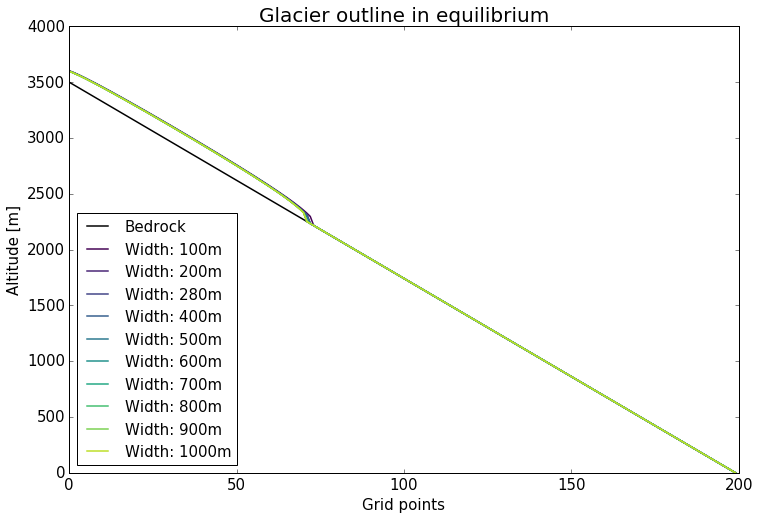

In [125]:
plt.plot(bed_h_cont[0], color='k', label='Bedrock')
for i in range(0, n_flowline):
    col = scalarMap.to_rgba(i)
    plt.plot(surface_h_cont[i], color=col,
             label=flowline_name[i])
    
plt.title('Glacier outline in equilibrium')
plt.xlabel('Grid points')
plt.ylabel('Altitude [m]')
plt.legend(loc=3)

In [112]:
for l in lenght_cont:
    print(l)

7400.0
7300.0
7200.0
7200.0
7200.0
7200.0
7200.0
7200.0
7100.0
7100.0


74
73
72
72
72
72
72
72
71
71


array([ 129.09242358,  126.65110921,  126.85331279,  125.92794096,
        125.13074303,  124.20688413,  123.86504642,  123.69111851,
        125.23649421,  125.07171308])

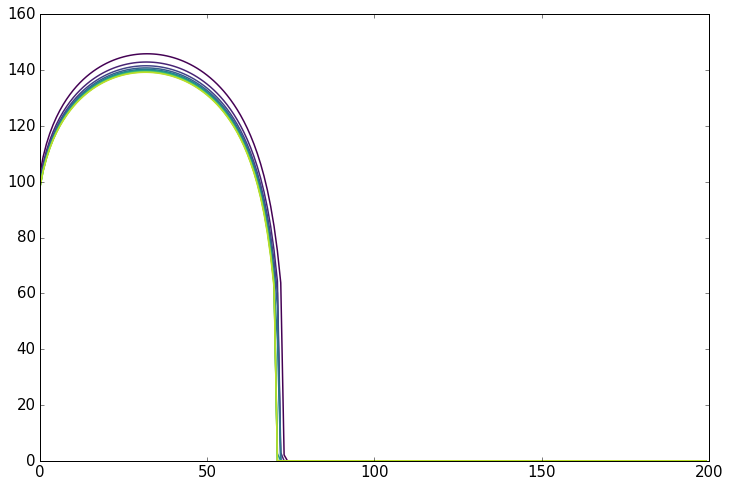

In [126]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    print(ind)
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

74
73
72
72
72
72
72
72
71
71


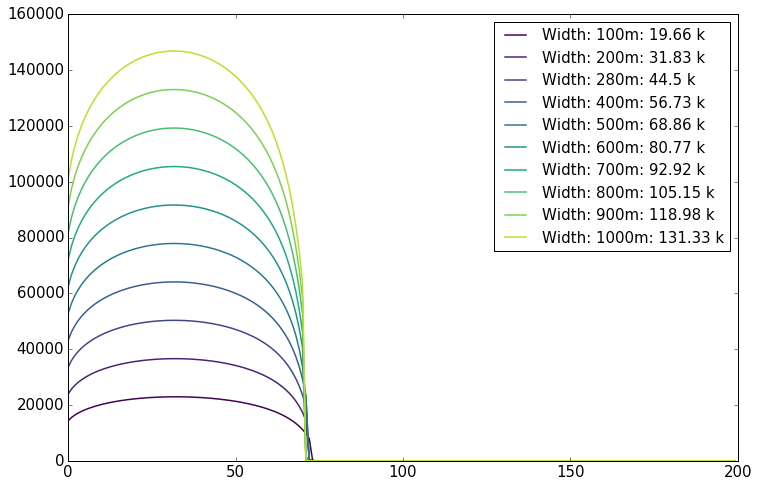

In [128]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    print(ind)
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{}: {} k'.format(flowline_name[i], round(mean/1e3, 2)), color=col)
    
plt.legend()

### Parabolic bed shape

In [129]:
flowline_name = ['Bedshape: 0.001',
                'Bedshape: 0.0015',
                'Bedshape: 0.002',
                'Bedshape: 0.0025',
                'Bedshape: 0.003',
                'Bedshape: 0.0035',
                'Bedshape: 0.004',]
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [130]:
for r, bs in enumerate(np.linspace(1e-3, 4e-3, 7, endpoint=True)):
    # Define the bed shape
    bed_shape = np.zeros(nx) + bs

    # Define our bed
    init_flowline[r] = ParabolicFlowline(surface_h=surface_h, bed_h=bed_h,
                                        bed_shape=bed_shape, map_dx=map_dx)

# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h
    width_cont.append(model.fls[-1].widths_m)
    sec_cont.append(model.fls[-1].section)

1: Running model for Bedshape: 0.001 ...
    ... and storing output.
2: Running model for Bedshape: 0.0015 ...
    ... and storing output.
3: Running model for Bedshape: 0.002 ...
    ... and storing output.
4: Running model for Bedshape: 0.0025 ...
    ... and storing output.
5: Running model for Bedshape: 0.003 ...
    ... and storing output.
6: Running model for Bedshape: 0.0035 ...
    ... and storing output.
7: Running model for Bedshape: 0.004 ...
    ... and storing output.


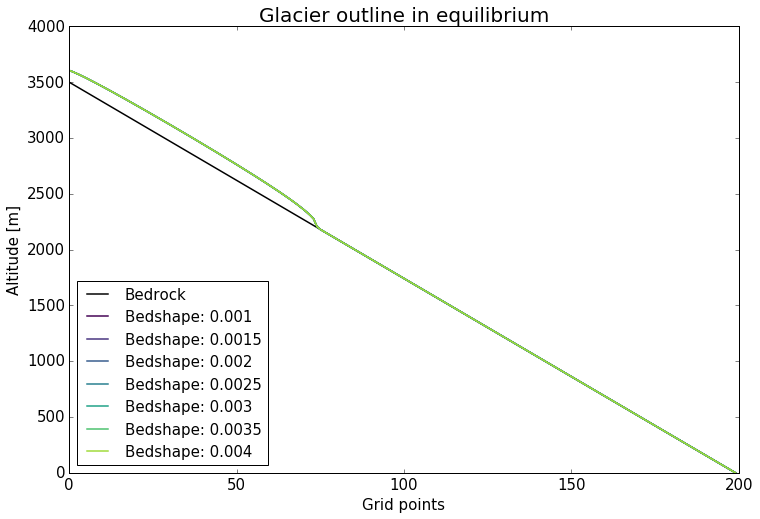

In [131]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n_flowline)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)

plt.plot(bed_h_cont[0], color='k', label='Bedrock')

for i in range(0, n_flowline):
    col = scalarMap.to_rgba(i)
    plt.plot(surface_h_cont[i], color=col,
             label=flowline_name[i])
    
plt.title('Glacier outline in equilibrium')
plt.xlabel('Grid points')
plt.ylabel('Altitude [m]')
plt.legend(loc=3)

In [132]:
for l in lenght_cont:
    print(l)

7600.0
7600.0
7700.0
7700.0
7700.0
7700.0
7700.0


75
75
76
76
76
76
76


array([ 131.81603274,  131.8163066 ,  130.08209133,  130.08226462,
        130.08241393,  130.08254591,  130.08266472])

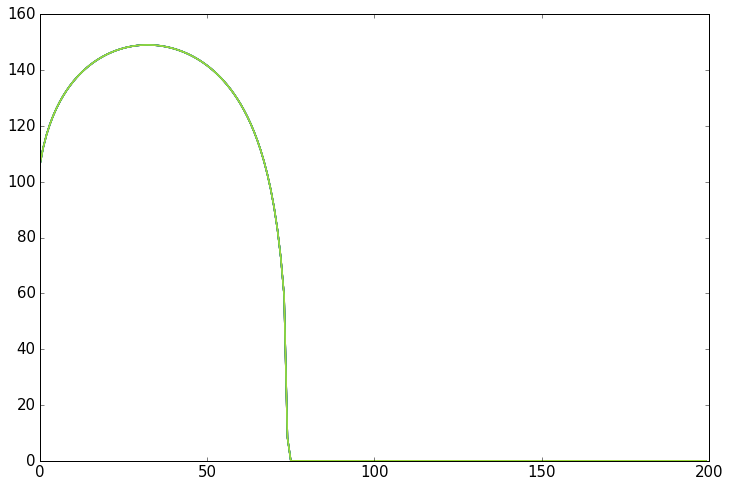

In [133]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    print(ind)
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

76
76
76
76
76
76
76


array([ 355.8886816,  355.8886816,  355.8886816,  355.8886816,
        355.8886816,  355.8886816,  355.8886816])

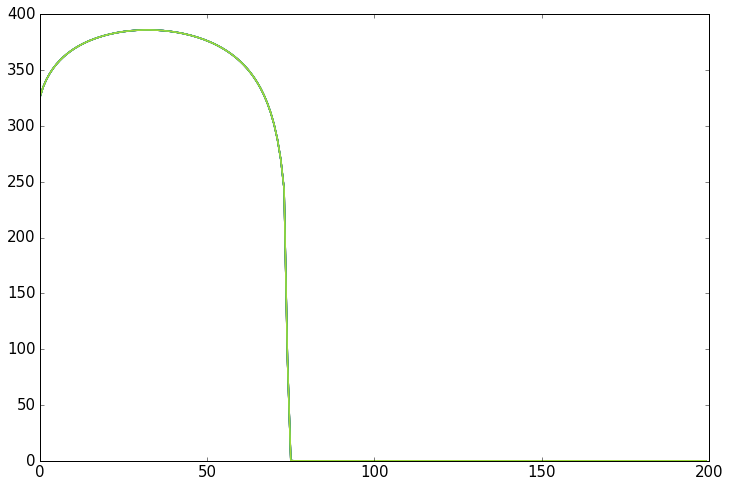

In [138]:

widthness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    width__ = model.fls[0].widths_m
    
    ind = np.where(width__ == 0)[0][0]
    print(ind)
    widthness[i] = width__[:ind].mean()
    plt.plot(width__, color=col)
    
widthness

75
75
76
76
76
76
76


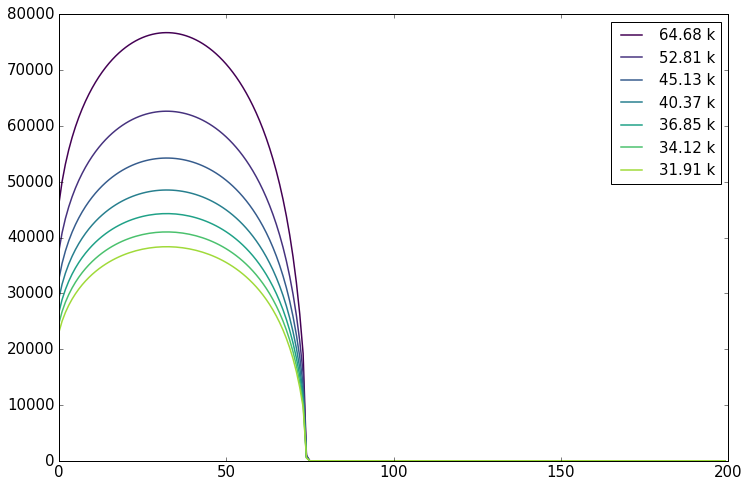

In [135]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    print(ind)
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{} k'.format(round(mean/1e3,2)), color=col)
    
plt.legend()

#### Vertical wall flowline

In [117]:
flowline_name = ['Width: 100m', 
                 'Width: 200m', 
                 'Width: 280m', 
                 'Width: 400m', 
                 'Width: 500m', 
                 'Width: 600m', 
                 'Width: 700m', 
                 'Width: 800m', 
                 'Width: 900m', 
                 'Width: 1000m']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [121]:
for i, w in enumerate(np.arange(1, 10+1, 1)):
    if i == 2:
        w = 2.8
    widths = np.zeros(nx) + w
    # Define our bed
    init_flowline[i] = VerticalWallFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=w, map_dx=map_dx)
    
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h
    width_cont.append(model.fls[-1].widths_m)
    sec_cont.append(model.fls[-1].section)

1: Running model for Width: 100m ...
    ... and storing output.
2: Running model for Width: 200m ...
    ... and storing output.
3: Running model for Width: 280m ...
    ... and storing output.
4: Running model for Width: 400m ...
    ... and storing output.
5: Running model for Width: 500m ...
    ... and storing output.
6: Running model for Width: 600m ...
    ... and storing output.
7: Running model for Width: 700m ...
    ... and storing output.
8: Running model for Width: 800m ...
    ... and storing output.
9: Running model for Width: 900m ...
    ... and storing output.
10: Running model for Width: 1000m ...
    ... and storing output.


71
71
71
71
71
71
71
71
71
71


array([ 123.7290234,  123.7290234,  123.7290234,  123.7290234,
        123.7290234,  123.7290234,  123.7290234,  123.7290234,
        123.7290234,  123.7290234])

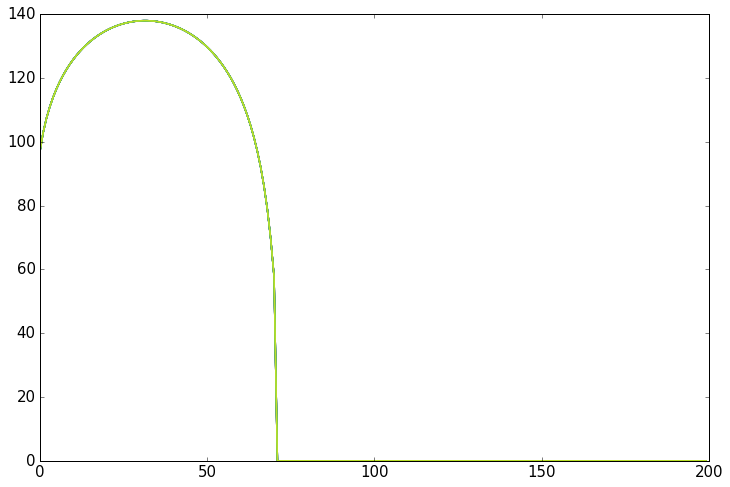

In [119]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    ind = np.where(thick_ == 0)[0][0]
    print(ind)
    
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

71
71
71
71
71
71
71
71
71
71


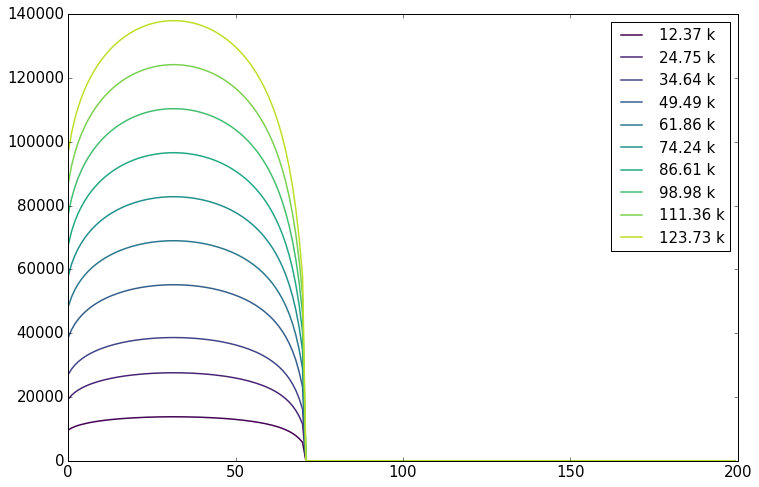

In [123]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    print(ind)
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{} k'.format(round(mean/1e3, 2)), color=col)
    
plt.legend()

##### Length and volume change over time

In [ ]:
# Define an array for all years of interest
year0 = 0
year1 = 400
year_step = 20
years = np.arange(year0, year1+1, year_step)
n_exp = years.size
print(years)

In [ ]:
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

flowline_name = ['Width: 100m', 
                 'Width: 1\'000m', 
                 'Width: 10\'000m']

widths = np.array([1.,10.,100.])
n_flowline = widths.size
init_flowline = ['None']*n_flowline

for i, w in enumerate(widths):
    widths = np.zeros(nx) + w
    # Define our bed
    init_flowline[i] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=w, map_dx=map_dx,
                                           lambdas=lambdas)

# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))

print(type(lenght_cont_))

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3

In [ ]:
for i in range(0, n_flowline):
    plt.plot(years, lenght_cont_[i], label=flowline_name[i])

plt.title('Glacier lenght development over time')
plt.xlabel('Years')
plt.ylabel('Length [m]')
plt.legend(loc='best')

In [ ]:
for l in lenght_cont_:
    print(l[-1])